In [83]:
import pandas as pd 
import matplotlib.pyplot as plt 
import networkx as nx 


In [224]:
raw_data = pd.read_csv("raw_data.csv", header=None)


In [85]:
our_subject =pd.read_csv("subjects.csv", header=None)
our_subject = list(set(our_subject[0].tolist()))
our_subject.sort()
print(our_subject)

[1710105, 1710210, 1710217, 1710417, 1712212, 1712312, 1712315, 1712417, 1712432, 1712444, 1712452, 1714297, 1714303, 1714308, 1714320, 1714396, 1714417, 1714480, 1716310, 1716405, 1716408, 1716410, 1716430, 1716448, 1718210, 1718217, 1718303, 1718312, 1718416, 1718417, 1718425, 1718436, 1718448, 1718450, 1720405, 1730115, 1730120, 1730155, 1730217, 1730220, 1730400, 1730402, 1730403, 1730420, 1730430, 1730435, 1730460, 1730499, 1732203, 1732207, 1732208, 1732303, 1732312, 1732417, 1734102, 1734212, 1734303, 1734308, 1734333, 1734400, 1734425, 1734449, 1736310, 1740320, 1740417, 1914106, 1914251, 1914271, 2010115, 2010125]


In [86]:
def CrossCount(first, second):
    mask1 = raw_data.iloc[:,3] == first
    mask2 = raw_data.iloc[:,4] == second
    mask = mask2 & mask1

    group = raw_data[mask]
    return sum(group.iloc[:, 2])

In [87]:
cross_matrix = [[0 for j in our_subject] for i in our_subject]

for x in range(len(our_subject)):
    for y in range(len(our_subject)):
        cross_matrix[x][y] = max(CrossCount(our_subject[x], our_subject[y]), CrossCount(our_subject[y], our_subject[x]))

In [88]:
cross_matrix_df = pd.DataFrame(cross_matrix, index=our_subject, columns=our_subject)
print(cross_matrix_df)

         1710105  1710210  1710217  1710417  1712212  1712312  1712315   
1710105      200        8       21        0       12        2        1  \
1710210        8      105        0        0       98        0        1   
1710217       21        0       63        0        0        0        0   
1710417        0        0        0       69        0       13       21   
1712212       12       98        0        0      123        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
1914106        2        0        1        0        0        0        0   
1914251      154        0       10        0        0        0        0   
1914271        0        1        0        1        0        0        0   
2010115        1        0        1        0        0        0        0   
2010125      157        1       12        0        1        0        0   

         1712417  1712432  1712444  ...  1734425  1734449  1736310  1740320   
1710105        1        4       

In [89]:
cross_matrix_df.to_csv("cross_matrix.csv")

In [90]:
edges = []
for i in range(len(our_subject)):
  for j in range(len(our_subject)):
   if cross_matrix[i][j] == 0: 
      edges.append([i,j])

In [91]:
G = nx.Graph()
G.add_edges_from(edges)
cliques = list(nx.find_cliques(G))
all_kernel_number = []
all_kernel_code = []

cliques = sorted(cliques, key=lambda x: len(x), reverse=True)
print(len(cliques))
for clique in cliques:
    all_kernel_code.append(set([our_subject[i] for i in clique]))
    all_kernel_number.append(set(clique))


28672


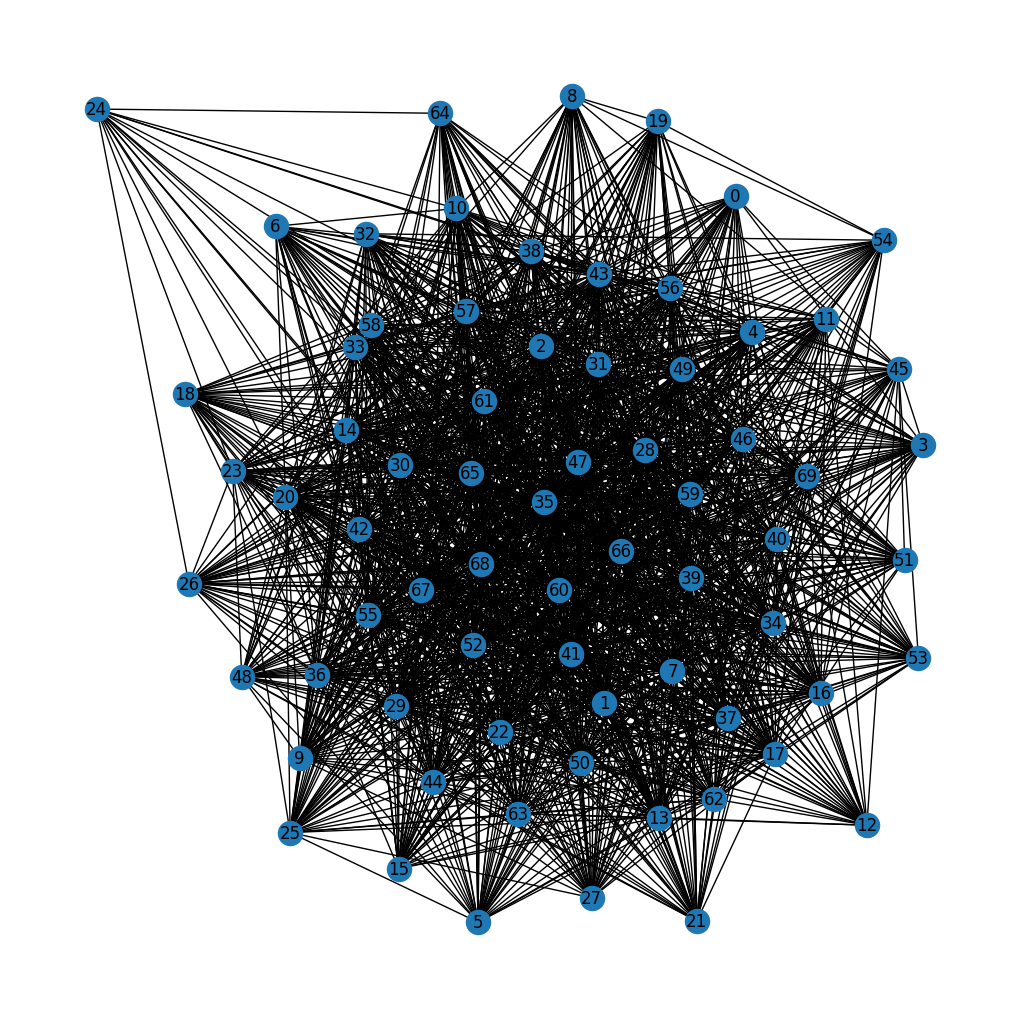

In [92]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [93]:
def greedy_set_cover(universe, subsets):
    covered = set()  # Tracks covered elements
    cover_sets = []  # Holds chosen subsets
    
    counter = 0
    while covered != universe:
        counter += 1
        if counter > len(subsets)**2:
            print("Infinite loop detected.")
            break
        best_subset = None
        max_covered = set()
        
        for subset in subsets:
            new_covered = subset - covered  # Calculate elements covered by the subset
            if len(new_covered) > len(max_covered):
                best_subset = subset
                max_covered = new_covered
        
        if(best_subset == None):
            break
        cover_sets.append(best_subset)
        covered |= max_covered
    
    return cover_sets

universe = set()
for subset in all_kernel_number:
    universe |= subset
print("Universe:", universe)


Universe: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}


In [94]:
x = [len(i) for i in all_kernel_number]

unique_x = list(set(x))
for i in unique_x:
    print(i, x.count(i))


4 4
5 28
6 328
7 1782
8 5108
9 8284
10 8086
11 4258
12 756
13 38


In [95]:
def same_day_subjects(subjects):
    subjects = set(subjects)
    temp = [x for x in all_kernel_code if subjects.issubset(x)]
    temp.sort(key=lambda x: len(x), reverse=True)
    return temp

In [96]:
temp = same_day_subjects([2010115, 2010125, 1740417, 1730420])
print(temp)
print([len(x) for x in temp])
print(temp[0])


[{1740417, 2010115, 1734308, 1712452, 1914251, 2010125, 1732207, 1710417, 1730420, 1914106}, {1740417, 2010115, 1734308, 1914251, 2010125, 1732207, 1718416, 1710417, 1730420, 1914106}, {1740417, 1712417, 2010115, 1734308, 1914251, 2010125, 1732207, 1730420, 1914106}, {1740417, 2010115, 1730120, 1914251, 2010125, 1710417, 1730420, 1914106}, {1740417, 1712417, 2010115, 1730120, 1914251, 2010125, 1730420, 1914106}]
[10, 10, 9, 8, 8]
{1740417, 2010115, 1734308, 1712452, 1914251, 2010125, 1732207, 1710417, 1730420, 1914106}


In [97]:
print(cross_matrix_df[1716310][[2010115, 2010125, 1740417, 1730420]])

2010115    0
2010125    1
1740417    1
1730420    0
Name: 1716310, dtype: int64


In [263]:
plan = pd.read_csv("plan.csv", header=None)[0].to_list()
plan.reverse()

temp = []
final = []

for i in plan:
    if i == -1:
        final.append(temp)
        temp = []
    else:
        temp.append(i)
final.reverse()
plan = final
plan

[[1734102,
  1730115,
  1720405,
  1734308,
  1734303,
  1718312,
  1710417,
  1712452,
  1710210],
 [1736310, 1734212, 1730402, 1730460, 1716408, 1712315, 1710105, 1718417],
 [1730155, 1730220, 1730400, 1730435, 1732417, 1714320, 1712432],
 [1732312, 1730430, 1718450, 1732303, 1732203],
 [1730217, 1730499, 1734425, 1730403, 1714417, 1714303, 1714297],
 [1734449, 1734102, 1716405],
 [1740320, 1712212, 1712444, 1718436, 1914271, 1914106],
 [1734400, 1730120, 1716410, 1712417, 1710217],
 [1718416, 1732207, 1716430, 1714396, 1714308, 1718425, 1914251],
 [1716448, 1718303, 1718210, 1712312],
 [1734333, 1732208, 1718448, 1718217, 1714480],
 [1716310, 1730420, 1740417, 2010115, 2010125]]

In [99]:
def find_sequence_number(day1, day2):
    ans = 0
    for i in day1:
        for j in day2:
            try:
                ans += max(cross_matrix_df[i][j], cross_matrix_df[j][i])
            except:
                print(i, j)
    return ans

In [102]:
def find_sequence_plan(inp_plan):
    ans = 0
    for i in range(len(inp_plan)-1):
        ans += find_sequence_number(inp_plan[i], inp_plan[i+1])
    return ans

In [188]:
plan = [[1730115, 1720405, 1734308, 1734303, 1718312, 1710417, 1712452, 1710210],
        [1736310, 1734212, 1730402, 1730460, 1716408, 1710105, 1718417],
        [1730155, 1730220, 1730400, 1730435, 1732417, 1714320],
        [1732312, 1730430, 1718450, 1732303, 1732203], 
        [1730217, 1730499, 1734425, 1730403, 1714417, 1714303, 1714297], 
        [1734449, 1734102, 1716405], 
        [1740320, 1712212, 1712444, 1718436, 1914271, 1914106], 
        [1734400, 1730120, 1716410, 1712417, 1710217], 
        [1718416, 1732207, 1716430, 1714396, 1714308, 1718425, 1914251], 
        [1716448, 1718303, 1712312],
        [1734333, 1732208, 1718448, 1718217, 1714480], 
        [1716310, 2010115]]


In [260]:
plan = [[1730115, 1720405, 1734308, 1734303, 1718312, 1710417, 1712452, 1710210],
        [ 1734212, 1730402, 1730460, 1716408, 1710105, 1718417],
        [1730155, 1730400, 1730435, 1732417, 1714320],
        [1730430, 1718450, 1732303, 1732203], 
        [1730217, 1730499, 1734425, 1730403, 1714417, 1714303, 1714297], 
        [1734449, 1734102, 1716405], 
        [1740320, 1712212, 1712444, 1718436, 1914271, 1914106, 1736310], 
        [1734400, 1730120, 1716410, 1712417, 1710217], 
        [1718416, 1732207, 1716430, 1714396, 1714308, 1718425, 1914251, 1730220], 
        [1716448, 1718303, 1712312],
        [1734333, 1732208, 1718448, 1718217, 1714480], 
        [1716310, 2010115, 1730435]]


temp = plan
sumject = 1732312
for i in range(len(plan)):
    temp[i].append(sumject)
    g = same_day_subjects(temp[i])
    if len(g) > 0:
        print(find_sequence_plan(temp), i+1, temp[i])
        print(same_day_subjects(temp[i]))
    else:
        print(find_sequence_plan(temp), i+1)
    temp[i].remove(sumject)

print(plan)

668 1
681 2
668 3
683 4 [1730430, 1718450, 1732303, 1732203, 1732312]
[{1730115, 1732203, 1716430, 1732303, 1718450, 1732312, 1730430}]
664 5
689 6 [1734449, 1734102, 1716405, 1732312]
[{1730115, 1710217, 1718416, 1734449, 1712432, 1716405, 1734102, 1732312, 1718425}, {1730115, 1730155, 1718416, 1734449, 1712432, 1716405, 1734102, 1732312, 1718425}]
669 7
679 8
669 9
674 10 [1716448, 1718303, 1712312, 1732312]
[{1716448, 1710210, 2010115, 1734308, 1732207, 1730420, 1720405, 1732312, 1914106, 1712312, 1718303}, {1716448, 2010115, 1734308, 1732207, 1730420, 1720405, 1732312, 1914106, 1718303, 1712312, 1914271}, {1716448, 1710210, 2010115, 1730499, 1730220, 1732207, 1720405, 1732312, 1914106, 1712312, 1718303}, {1716448, 2010115, 1730499, 1730220, 1732207, 1720405, 1732312, 1914106, 1718303, 1712312, 1914271}, {1716448, 1710210, 2010115, 1730499, 1730220, 1732208, 1720405, 1732312, 1914106, 1712312, 1718303}, {1716448, 2010115, 1730499, 1730220, 1732208, 1720405, 1732312, 1914106, 1718303

In [217]:
x = [1740320, 1712212, 1712444, 1718436, 1914271, 1914106]


sumject = 1736310
for i in x:
    print(cross_matrix_df[sumject][i])

check_day(x)

0
0
0
0
0
0


[]

In [164]:
def check_day(day):
    ans = []
    for i in day:
        for j in day:
            if i != j:
                if cross_matrix_df[i][j] != 0:
                    ans.append([max(i, j), min(i, j), cross_matrix_df[i][j]])
    # make ans unique
    temp = []
    for i in ans:
        if i not in temp:
            temp.append(i)
    return temp

In [265]:
plan = [
 [1734102, 1730115, 1720405, 1734308, 1734303, 1718312, 1710417, 1712452, 1710210],
 [ 1734212, 1730402, 1730460, 1716408, 1712315, 1710105, 1718417],
 [1730155, 1730400, 1732417, 1714320, 1712432],
 [1732312, 1730430, 1718450, 1732303, 1732203],
 [1730217, 1730499, 1734425, 1730403, 1714417, 1714303, 1714297],
 [1734449, 1734102, 1716405],
 [1740320, 1712212, 1712444, 1718436, 1914271, 1914106, 1736310],
 [1734400, 1730120, 1716410, 1712417, 1710217],
 [1718416, 1732207, 1716430, 1714396, 1714308, 1718425, 1914251, 1730220],
 [1716448, 1718303, 1718210, 1712312],
 [1734333, 1732208, 1718448, 1718217, 1714480],
 [1716310, 1730420, 1740417, 2010115, 2010125, 1730435]
 ]

#x = plan[11]
#print(x)
"""
1730220 -9
1736310 - 7
1730435  - 12
"""

for x in plan:
    print(check_day(x))
#raw_data[3]==1734102
#raw_data[raw_data[3]==1734102 & raw_data[4]==1710210]

[[1734102, 1710417, 4], [1734102, 1712452, 2], [1734102, 1710210, 14]]
[[1712315, 1710105, 1]]
[[1732417, 1712432, 1], [1714320, 1712432, 1]]
[]
[]
[]
[]
[]
[]
[[1718210, 1712312, 1]]
[]
[[1740417, 1716310, 1], [2010125, 1716310, 1], [1740417, 1730435, 6]]


In [262]:
x = [1716448, 1718303, 1718210, 1712312]


for t in x:
    mask1 = raw_data[3] == t
    mask2 = raw_data[4] ==  1732312
    print(raw_data[mask1 & mask2])

Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []
Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []
               0           1  2        3        4
4475  1718210-01  1732312-01  3  1718210  1732312
4476  1718210-02  1732312-01  1  1718210  1732312
4477  1718210-03  1732312-01  1  1718210  1732312
4478  1718210-04  1732312-01  1  1718210  1732312
Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []
